## Initial Data Analysis - Part 2

In [17]:
import numpy as np
import pandas as pd
import nltk
import string
import collections
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import sent_tokenize
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words+=["restaurant", "restaurants", "food", "would", "u", "n't", "ve"]
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
df = pd.read_csv("data/il_reviews.csv")

In [19]:
df.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,mofOjB6flg-eAWOFbOkHfQ,0,12/2/2017 20:22,0,8MTptiOpUeuPUFZgtfk9Vw,1,I would have given this restaurant zero stars ...,1,9-vNlkNQL7OJQZ7-U965Ww
1,mofOjB6flg-eAWOFbOkHfQ,0,12/16/2017 4:31,0,ofpfzn8LV4nJ2pE6IlTVdg,1,So...no. Just...no. Before I picked up a plate...,1,#NAME?


In [20]:
df.drop(["cool","date","funny","useful"],axis = 1,inplace=True)

In [21]:
df.sample()

,business_id,review_id,stars,text,user_id
2110,t0HT9od2xZ0Fc5a0PFB2BQ,wrE8jxfXqktDyM8ejIFeUg,1,One star is too much. I haven't been to Kams s...,zeyHMawalZblnXhMOK4s4g


In [22]:
df[["business_id","text"]].as_matrix()[0]

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array(['mofOjB6flg-eAWOFbOkHfQ',
       "I would have given this restaurant zero stars if the app allowed it. This is a disgusting restaurant. You can find roaches lurching around the food. The 'clean' dishes next to buffet items are mostly dirty. Just look at the bottom of the plate. This restaurant should really be inspected by authorities."],
      dtype=object)

In [23]:
processedData = list(df[["business_id","text"]].as_matrix())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [24]:
processedData[6702]

array(['cDGaMsCAx8guR1IUrxLxWA',
       "The shrimp pho was a good treat on a chilly January afternoon in Champaign. It is served bland, but this can be resolved with bottles of Sriracha and other hot sauces on the counter.\r\n\r\nI was disappointed that they don't accept American Express, but that might be just me."],
      dtype=object)

## Tokenization

In [26]:
WNlemma = nltk.WordNetLemmatizer()

In [27]:
def tokenize(x):
    res = []
    ans = []
    ans.append(x[0])
    data = x[1]
    
    for val in sent_tokenize(data):
        val = val.strip(string.punctuation).lower()
        filtered_text = [w for w in word_tokenize(val) if not w in stop_words]
 
        lemmatized_tokens = [WNlemma.lemmatize(w.strip(string.punctuation)) for w in filtered_text if w.strip(string.punctuation)!=""]
        
        res = res+lemmatized_tokens
    
    ans.append(res)
    
    return ans

In [28]:
map(tokenize,processedData)

In [14]:
clean_reviews = list(map(tokenize,processedData))
clean_text = []
for x in clean_reviews:
    clean_text.append(x[1])
# print (clean_text)
token_list = []
for x in clean_text:
    token_list = token_list + x
# print(token_list)
# print (stop_words)

- Word cloud with stop words and without lemmatiztion to analyze the top words used in the reviews.

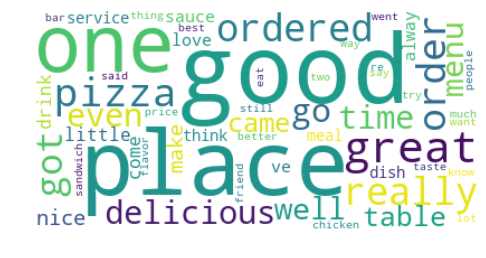

In [29]:
text = ""
for x in token_list:
    text = text + " " + x
# text = str(token_list)  # raw reviews

# Create stopword list:
stop_words = set(STOPWORDS)
stop_words.update(["restaurant","restaurants", "food"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stop_words, min_font_size = 10, background_color = "white").generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
# wordcloud.to_file("Images/after_lemmatization.png")

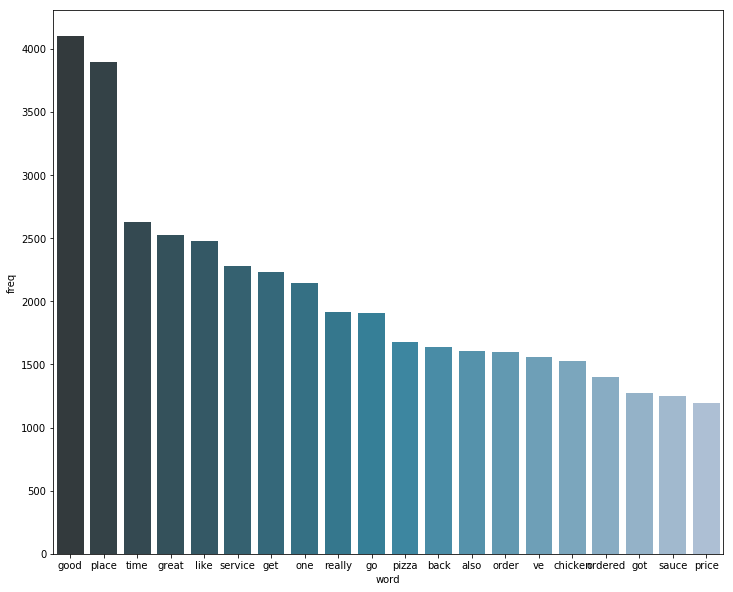

In [31]:
cv = CountVectorizer()
bow = cv.fit_transform(token_list)
# print (cv.get_feature_names())
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show()